In [29]:
import pandas as pd
import cv2 as cv
import numpy as np
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizer_v2.rmsprop import RMSProp
import os
import glob
import tqdm
import matplotlib.pyplot as plt


In [30]:
df= pd.read_csv('C:/Users/pushpasri/Desktop/ComputerVision/Resources/fer2013.csv')
CLASSES={0:'Anger',
              1:'Disgust',
              2:'Fear',
              3:'Happiness',
              4:'Neutral',
              5:'Sadness',
              6:'Surprise'}
df['emotion'].replace(CLASSES,inplace=True)
df['emotion'].value_counts()

emotion
Happiness    8989
Surprise     6198
Neutral      6077
Fear         5121
Anger        4953
Sadness      4002
Disgust       547
Name: count, dtype: int64

In [31]:
dfs=[]
for c in CLASSES.values():
    dfs.append(df[df['emotion']==c].head(500))
df=pd.concat(dfs)
df['emotion'].value_counts()

emotion
Anger        500
Disgust      500
Fear         500
Happiness    500
Neutral      500
Sadness      500
Surprise     500
Name: count, dtype: int64

In [32]:
import numpy as np
fe_data=[]
for row in df.values:
    e=row[0]
    pixels=list(map(int,row[1].split(' ')))
    fe_data.append(pixels+[e])
df=pd.DataFrame(fe_data, columns=['P{0}'.format(v+1) for v in range(len(pixels))] + ['Emotion'])
df



,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P2296,P2297,P2298,P2299,P2300,P2301,P2302,P2303,P2304,Emotion
0,70,80,82,72,58,58,60,63,54,58,...,182,183,136,106,116,95,106,109,82,Anger
1,151,150,147,155,148,133,111,140,170,174,...,108,95,108,102,67,171,193,183,184,Anger
2,30,24,21,23,25,25,49,67,84,103,...,106,111,148,137,176,174,172,173,173,Anger
3,123,125,124,142,209,226,234,236,231,232,...,103,116,111,105,105,103,97,91,89,Anger
4,8,9,14,21,26,32,37,46,52,62,...,74,75,74,80,91,101,103,122,130,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,65,58,49,50,53,45,46,46,80,90,...,89,80,86,141,152,143,143,135,129,Surprise
3496,59,58,38,30,24,13,24,9,14,19,...,19,19,6,36,126,111,88,93,114,Surprise
3497,52,44,33,67,102,92,42,33,28,35,...,37,41,36,30,28,25,12,12,14,Surprise
3498,53,41,39,36,36,25,30,27,19,27,...,151,152,150,150,140,128,108,73,99,Surprise


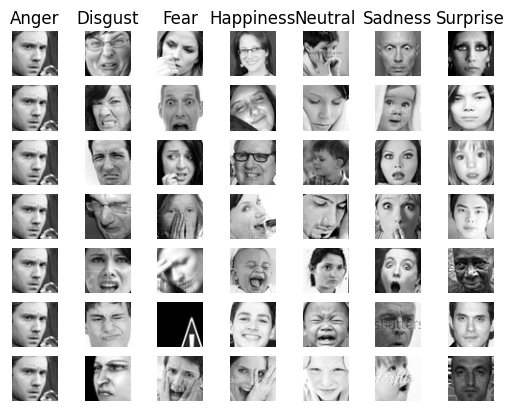

In [33]:
N_CLASSES =len(CLASSES)
fig,axes = plt.subplots(nrows=N_CLASSES, ncols=N_CLASSES)
for row in range(N_CLASSES):
    for col in range(N_CLASSES):
        pixels=df[df['Emotion']==CLASSES[col]].values[row*col,:-1]
        img=pixels.reshape((48,48)).astype(np.uint8)
        axes[row][col].imshow(img,cmap='gray')
        axes[row][col].axis('off')  
       
        if row==0:
            axes[row][col].set_title(CLASSES[col])

In [34]:


##DEEP LEARNING##
INPUT_SIZE=(48,48,1)
model=Sequential(name='emotion_recognizer')
model.add(layers.Conv2D(32,kernel_size= (3,3),activation='relu' , input_shape=INPUT_SIZE))
model.add(layers.Conv2D(64, kernel_size = (3,3),activation='relu' ))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(N_CLASSES,activation='softmax'))




In [35]:
from tensorflow.python.keras.utils.np_utils import to_categorical
df['Emotion'].replace({v: k for k,v in CLASSES.items()},inplace=True)
x=df.values[:,:-1].reshape((len(df),*INPUT_SIZE))
y=df.values[:,-1]
y_cat=to_categorical(y,N_CLASSES)
print('[INFO]Input Data Shape:: {0}'.format(x.shape))
print('[INFO]Output Date Shape::{0}'.format(y_cat.shape))

[INFO]Input Data Shape:: (3500, 48, 48, 1)
[INFO]Output Date Shape::(3500, 7)


In [36]:
model.compile(
    optimizer=RMSProp(),loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
model.fit(x, y_cat , epochs=10, batch_size = 32, validation_split=0.3)

Train on 2450 samples, validate on 1050 samples
Epoch 1/10
2450/2450 [==============================] - ETA: 0s - loss: 3.7158 - accuracy: 0.2049

C:\Users\pushpasri\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\keras\engine\training.py:2456: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2450/2450 [==============================] - 171s 70ms/sample - loss: 3.7158 - accuracy: 0.2049 - val_loss: 3.1242 - val_accuracy: 0.0152
Epoch 2/10
2450/2450 [==============================] - 144s 59ms/sample - loss: 1.6763 - accuracy: 0.2322 - val_loss: 4.4890 - val_accuracy: 0.0038
Epoch 3/10
2450/2450 [==============================] - 140s 57ms/sample - loss: 1.5934 - accuracy: 0.2996 - val_loss: 19.9385 - val_accuracy: 0.0133
Epoch 4/10
2450/2450 [==============================] - 146s 60ms/sample - loss: 1.5580 - accuracy: 0.3233 - val_loss: 11.9999 - val_accuracy: 9.5238e-04
Epoch 5/10
2450/2450 [==============================] - 143s 58ms/sample - loss: 1.4878 - accuracy: 0.3592 - val_loss: 10.6093 - val_accuracy: 0.0105
Epoch 6/10
1600/2450 [==================>...........] - ETA: 43s - loss: 1.4903 - accuracy: 0.3631

In [ ]:
import matplotlib.pyplot as plt
import mtcnn
mtcnn_model=mtcnn.MTCNN()
colors=[(31,119,180),(255,127,14),(44,160,44),(219,39,40),(148,103,189),(140,86,75),(227,119,194)]
img=cv.imread('')
img_rgb=cv.cvtColor(img,cv,COLOR_BGR2RGB)
boxes=mtcnn_model.detect_faces(img_rgb)
faces=[]
for box in boxes:
    x,y,w,h=box['box']
    face=img_rgb[y:y+h,x:x+w]
    face=cv.cvtColor(cv.resize(face,INPUT_SIZE[:-1]),cv.COLOR_RGB2GRAY)
    faces.append(face)
    data=np.array(faces).reshape(len(faces),*INPUT_SIZE)
    data=data/255.0
    scores=model.predixct(data)
    class_idx=np.argmax(scores,axis=1)
    for idx,box in zip(class_idx,boxes):
        x,y,w,h=box['box']
        cv.rectangle(imf_rgb,(x,y),(x+w,y+h),colors[idx],2)
        cv.putText(img_rgb,CLASSES[idx],(x,y=10),cv.FONT_HERSHEY_COMPLEX,5,colors[idx],20)
plt.figure(figsize=(14,14)
plt.imshow(img_rgb)